<a href="https://colab.research.google.com/github/KarHin22/Practical-Discrete-Mathematics/blob/master/Chapter%2010%20-%20Regression%20Analysis/Chapter10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 10 - Regression Analysis

This notebook contains code accompanying Chapter 10 Regression Analysis in *Practical Discrete Mathematics* by Ryan T. White and Archana Tikayat Ray.

## Auto Dataset

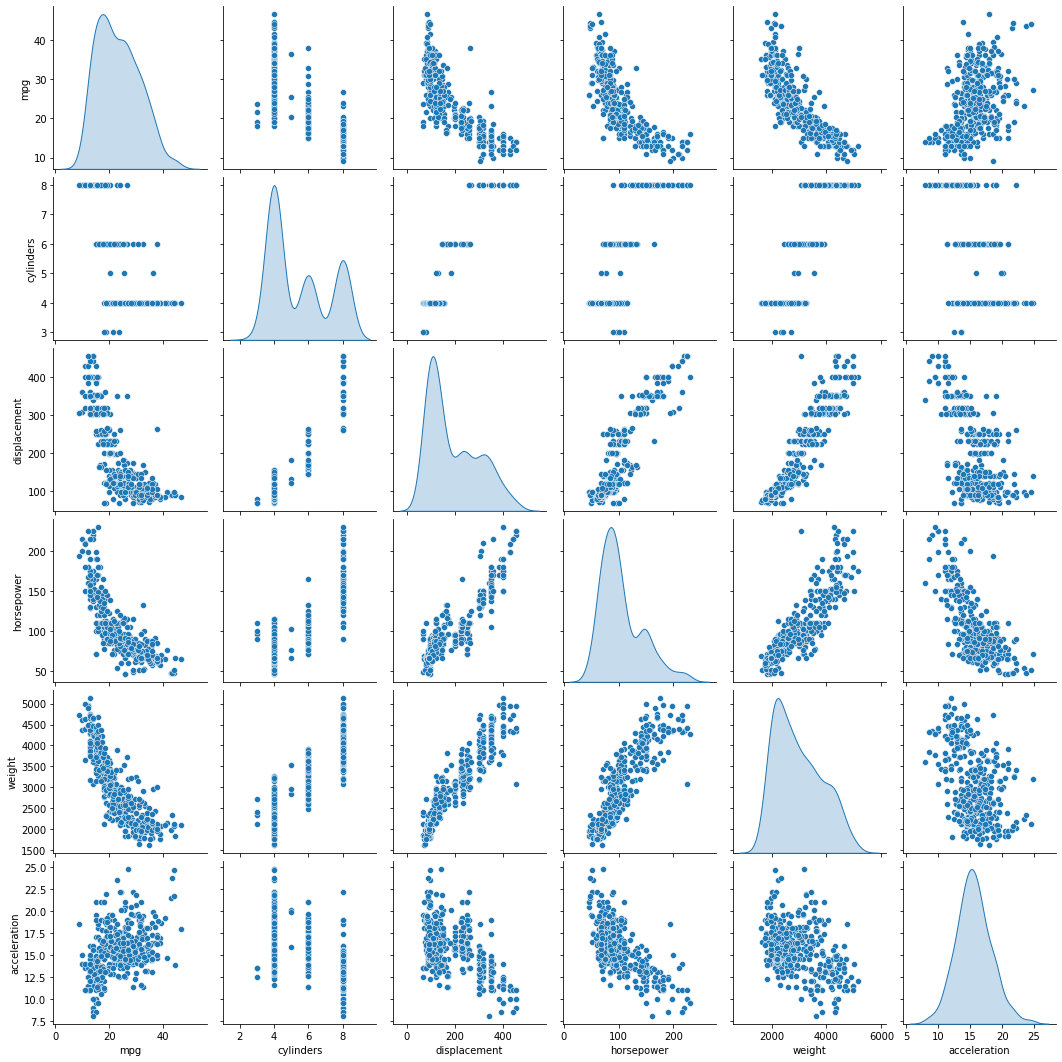

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Importing the csv file
df = pd.read_csv("auto_dataset.csv",index_col=0)

#Plotting the pairplot
sns.pairplot(df, diag_kind="kde")
plt.show()

## Least-squares lines with `NumPy`

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# find the shape of the auto dataset
df = pd.read_csv("auto_dataset.csv")
df.shape

(392, 7)

In [ ]:
X = df["weight"]
Y = df["horsepower"]

X_b = np.c_[np.ones((392,1)),X] #here we are adding X_o = 1 to all the feature values
beta_values = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)

print(beta_values)

[-12.1834847    0.03917702]


In [ ]:
X_new = np.array([[2500],[2045]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(beta_values)

print(f"Weight of car = 2500; predicted horsepower is {y_predict[0]:.3}; actual horsepower is 88")
print(f"Weight of car = 2045; predicted horsepower is {y_predict[1]:.3}; actual horsepower is 68")

Weight of car = 2500; predicted horsepower is 85.8; actual horsepower is 88
Weight of car = 2045; predicted horsepower is 67.9; actual horsepower is 68


C:\Users\Ryan\anaconda3\envs\DL\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


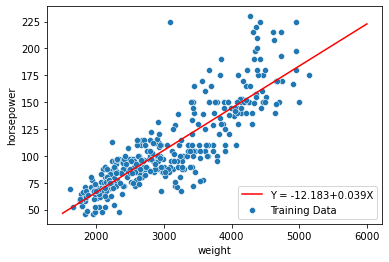

In [ ]:
X_plot= np.array([[1500],[6000]])
X_plot_b = np.c_[np.ones((2,1)),X_plot]
Y_plot = X_plot_b.dot(beta_values)

Equationline = "Y = {:.3f}+{:.3f}X".format(beta_values[0], beta_values[1])

plt.plot(X_plot, Y_plot, "r-", label = Equationline)
sns.scatterplot(X,Y, label = "Training Data")
plt.legend()
plt.show()

Next, we show how to find the model with scikit-learn.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
df = pd.read_csv("auto_dataset.csv")

X = df["weight"]
Y = df["horsepower"]

X = X.values.reshape(-1,1)
Y = Y.values.reshape(-1,1)

reg.fit(X, Y)

print("The value obtained for beta_o is:", reg.intercept_)
print("The value obtained for beta_1 is:", reg.coef_[0])

The value obtained for beta_o is: [-12.1834847]
The value obtained for beta_1 is: [0.03917702]


In [ ]:
# predict the output from a new datapoint
X_new = np.array([[2500],[2045]])
print(reg.predict(X_new))

[[85.75906307]
 [67.93351937]]


## Least-squares curves with `NumPy` and `SciPy`

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#Importing the dataset as a pandas dataframe
df = pd.read_csv("auto_dataset.csv")

#Selecting the variables of interest
X = df["horsepower"]
y = df["mpg"]

#Converting the series to a column matrix
X_new = X.values.reshape(-1,1)
y_new = y.values.reshape(-1,1)

#Fitting y = beta0 + beta1x + beta2x^2
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_new)

reg = LinearRegression()
reg.fit(X_poly, y_new)

print("Y = {:.4f} X^2 {:.3f} X + {:.3f}".format(reg.coef_[0,1], reg.coef_[0,0], reg.intercept_[0]))

Y = 0.0012 X^2 -0.466 X + 56.900


Let's plot the model.

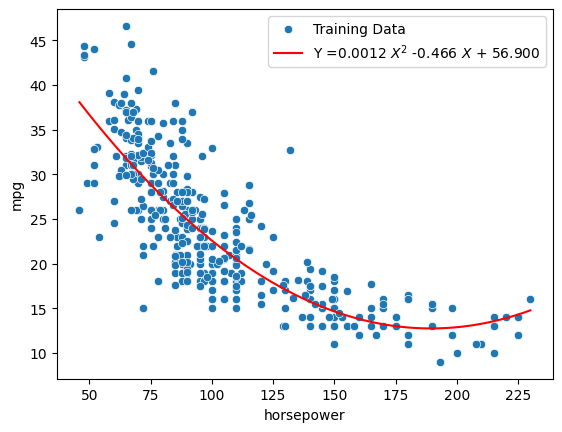

In [3]:
start = df["horsepower"].values.min()
stop = df["horsepower"].values.max()

X_plot = np.linspace(start, stop, 1000)
Y_plot = reg.coef_[0,1] * X_plot * X_plot + reg.coef_[0,0] * X_plot + reg.intercept_[0]

Equationline = "Y ={:.4f} $X^2$ {:.3f} $X$ + {:.3f}".format(reg.coef_[0,1], reg.coef_[0,0], reg.intercept_[0])

# Pass X and y as keyword arguments
sns.scatterplot(x=X, y=y, label = "Training Data")
plt.plot(X_plot, Y_plot, "r-", label = Equationline)
plt.legend()
plt.show()

### Least-squares surfaces with `NumPy` and `SciPy`

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

#Importing the csv file and choosing the X and Y variables
df = pd.read_csv("auto_dataset.csv")

Y = df["displacement"]
X = df[["horsepower","weight"]]

#Fitting the linear regression model
reg = LinearRegression()
reg.fit(X, Y)

# Printing the parameter values obtained after fitting the model
print("The value obtained for beta_o is: ", reg.intercept_)
print("The value obtained for beta_1 and beta_2 are: ",reg.coef_[0] , "and", reg.coef_[1] )

The value obtained for beta_o is:  -135.95073526530456
The value obtained for beta_1 and beta_2 are:  0.9757143655155813 and 0.07671670340152593


Let's plot the model.

No handles with labels found to put in legend.


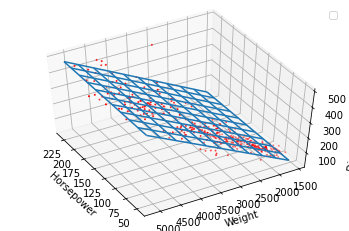

In [ ]:
# Plotting the surface plot
X1_min = df["horsepower"].values.min()
X1_max = df["horsepower"].values.max()
X1_values = np.linspace(X1_min, X1_max, 100)

X2_min = df["weight"].values.min()
X2_max = df["weight"].values.max()
X2_values = np.linspace(X2_min, X2_max, 100)

Y_reg = reg.intercept_ + (reg.coef_[0] * X1_values) + (reg.coef_[1] * X2_values)
Y_plot = Y_reg.reshape(-1,1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.horsepower, X.weight, Y, color="red", s=1)

X1_plot, X2_plot = np.meshgrid(X1_values, X2_values)
surf = ax.plot_wireframe(X1_plot, X2_plot, Y_plot, rstride=10, cstride=10)

ax.view_init(50, 150)
ax.set_xlabel('Horsepower')
ax.set_ylabel('Weight')
ax.set_zlabel('Displacement')
plt.legend()
plt.show()

## **Q1. Assume the 30 plot is calculated as above, please predict the following displacement based on the given horsepower and weight.**

### 1) horsepower = 87 and weight = 2589, what is the displacement value?

### 2) horsepower = 175 and weight = 4800, what is the displacement value?

In [4]:
# prompt: Predict the displacement if horsepower = 87 and weight = 2589.

# Predicting displacement for horsepower = 87 and weight = 2589
import pandas as pd
from sklearn.linear_model import LinearRegression

df = pd.read_csv("auto_dataset.csv")
Y = df["displacement"]
X = df[["horsepower","weight"]]

reg = LinearRegression()
reg.fit(X, Y)

new_data = pd.DataFrame({'horsepower': [87], 'weight': [2589]})
predicted_displacement = reg.predict(new_data)

print(f"Predicted displacement for horsepower = 87 and weight = 2589: {predicted_displacement[0]:.2f}")

Predicted displacement for horsepower = 87 and weight = 2589: 147.56


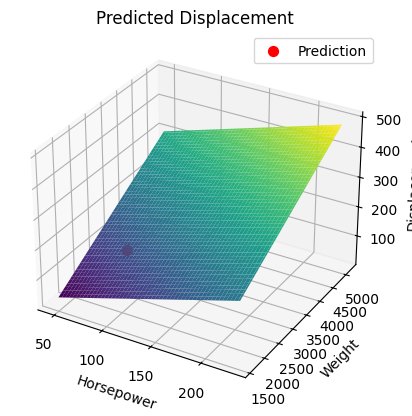

In [5]:
# prompt: Predict the displacement if horsepower = 87 and weight = 2589. Plot the model using surface plot.

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Assuming 'reg' is already fitted as in the provided code
# Create meshgrid for plotting
X1_min = df["horsepower"].min()
X1_max = df["horsepower"].max()
X1_values = np.linspace(X1_min, X1_max, 100)

X2_min = df["weight"].min()
X2_max = df["weight"].max()
X2_values = np.linspace(X2_min, X2_max, 100)

X1_plot, X2_plot = np.meshgrid(X1_values, X2_values)

# Predict displacement for the meshgrid points
Y_plot = reg.intercept_ + (reg.coef_[0] * X1_plot) + (reg.coef_[1] * X2_plot)

# Create the surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1_plot, X2_plot, Y_plot, cmap='viridis')

# Highlight the prediction point
new_data = pd.DataFrame({'horsepower': [87], 'weight': [2589]})
predicted_displacement = reg.predict(new_data)
ax.scatter(87, 2589, predicted_displacement, color='red', s=50, label='Prediction')

ax.set_xlabel('Horsepower')
ax.set_ylabel('Weight')
ax.set_zlabel('Displacement')
ax.set_title('Predicted Displacement')
plt.legend()
plt.show()

In [6]:
# prompt: Predict the displacement if horsepower = 175 and weight = 4800.

# Predicting displacement for horsepower = 175 and weight = 4800
import pandas as pd
from sklearn.linear_model import LinearRegression

df = pd.read_csv("auto_dataset.csv")
Y = df["displacement"]
X = df[["horsepower","weight"]]

reg = LinearRegression()
reg.fit(X, Y)

new_data = pd.DataFrame({'horsepower': [175], 'weight': [4800]})
predicted_displacement = reg.predict(new_data)

print(f"Predicted displacement for horsepower = 175 and weight = 4800: {predicted_displacement[0]:.2f}")

Predicted displacement for horsepower = 175 and weight = 4800: 403.04


Predicted displacement for horsepower = 175 and weight = 4800: 403.04


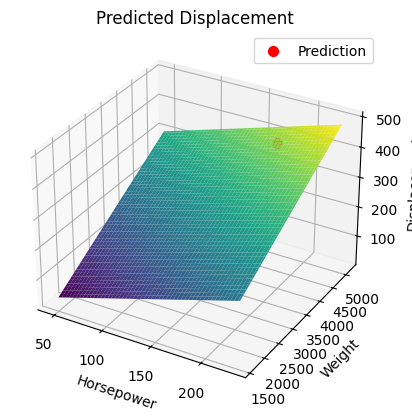

In [7]:
# prompt: Predict the displacement if horsepower = 175 and weight = 4800. Plot the model in 3D.

# Predicting displacement for horsepower = 175 and weight = 4800
new_data = pd.DataFrame({'horsepower': [175], 'weight': [4800]})
predicted_displacement = reg.predict(new_data)

print(f"Predicted displacement for horsepower = 175 and weight = 4800: {predicted_displacement[0]:.2f}")

# Assuming 'reg' is already fitted as in the provided code
# Create meshgrid for plotting
X1_min = df["horsepower"].min()
X1_max = df["horsepower"].max()
X1_values = np.linspace(X1_min, X1_max, 100)

X2_min = df["weight"].min()
X2_max = df["weight"].max()
X2_values = np.linspace(X2_min, X2_max, 100)

X1_plot, X2_plot = np.meshgrid(X1_values, X2_values)

# Predict displacement for the meshgrid points
Y_plot = reg.intercept_ + (reg.coef_[0] * X1_plot) + (reg.coef_[1] * X2_plot)

# Create the surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1_plot, X2_plot, Y_plot, cmap='viridis')

# Highlight the prediction point
new_data = pd.DataFrame({'horsepower': [175], 'weight': [4800]})
predicted_displacement = reg.predict(new_data)
ax.scatter(175, 4800, predicted_displacement, color='red', s=50, label='Prediction')

ax.set_xlabel('Horsepower')
ax.set_ylabel('Weight')
ax.set_zlabel('Displacement')
ax.set_title('Predicted Displacement')
plt.legend()
plt.show()


## **Q2. Please predict the horsepower based on the value of weight, acceleration and mpg. There are 3 X values and 1 Y value. Please train the model.**

Intercept: 115.7320541366234
Coefficients: [ 0.02824518 -5.42993202 -0.46817225]
Predicted horsepower: [93.19172375 93.01806737]


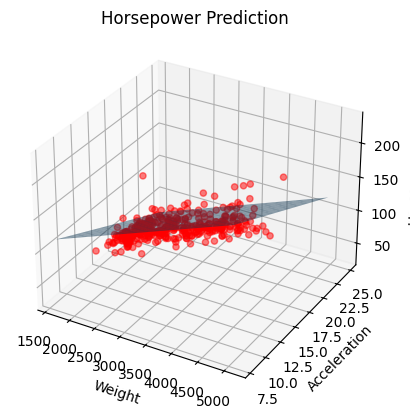

In [8]:
# prompt: Please predict the horsepower based on the value of weight, acceleration and mpg. There are 3 X values and 1 Y value. Plot the model.

import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Load the dataset
df = pd.read_csv("auto_dataset.csv")

# Prepare the data
X = df[["weight", "acceleration", "mpg"]]
y = df["horsepower"]

# Create and train the model
model = LinearRegression()
model.fit(X, y)

# Print the coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

# Predict horsepower for new data points (example)
new_data = pd.DataFrame({'weight': [2500, 2000], 'acceleration': [15, 12], 'mpg': [25, 30]})
predicted_horsepower = model.predict(new_data)
print("Predicted horsepower:", predicted_horsepower)

# Plot the model (simplified 3D plot for visualization)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a meshgrid for plotting
x_surf = np.arange(X["weight"].min(), X["weight"].max(), 200)  # Adjust step as needed
y_surf = np.arange(X["acceleration"].min(), X["acceleration"].max(), 1)  # Adjust step as needed
x_surf, y_surf = np.meshgrid(x_surf, y_surf)

# Predict z values based on x and y
z_surf = model.intercept_ + model.coef_[0] * x_surf + model.coef_[1] * y_surf #simplified for visualization
#z_surf = model.predict(np.c_[x_surf.ravel(), y_surf.ravel(), np.zeros_like(x_surf.ravel())])  # For all three features

# Plot the surface
ax.plot_surface(x_surf, y_surf, z_surf, alpha=0.5)


# Plot actual data points
ax.scatter(X["weight"], X["acceleration"], y, color='red', alpha=0.5)

ax.set_xlabel("Weight")
ax.set_ylabel("Acceleration")
ax.set_zlabel("Horsepower")
plt.title("Horsepower Prediction")
plt.show()